In [1]:
import json
import sys; sys.path.append('..')
from typing import List, Tuple, Dict

import torch
import numpy as np
import matplotlib.pyplot as plt

from src.utils.dp_targets import combine_dp_masks

from utils import load_img, add_bbox_to_img

In [2]:
with open('../data/densepose/densepose_coco_2014_small.json', 'r') as f:
    train = json.load(f)

In [13]:
from firelab.config import Config
from importlib import reload

import src.dataloaders.transforms
import src.dataloaders.construct

reload(src.dataloaders.transforms)
reload(src.dataloaders.construct)

config = Config({
    'data': {
        'annotations_dir': '../data/densepose',
        'coco_dir': '../data/coco',
    },
    'hp': {'batch_size': 3}
})

# t = src.dataloaders.transforms.construct_transforms()
d = src.dataloaders.construct.construct_dataloader(config, True, False, False)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [14]:
images, targets = next(iter(d))

FLIPPING


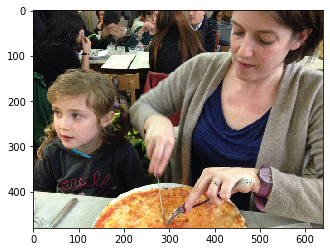

In [22]:
plt.imshow(load_img(110))

In [17]:
ann = [a for a in train['annotations'] if a['image_id'] == 86][0]

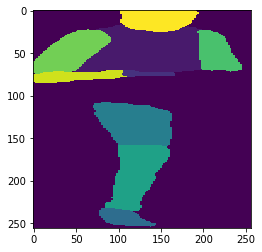

In [18]:
plt.imshow(combine_dp_masks(ann['dp_masks']))

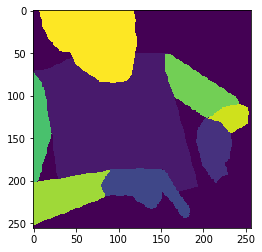

In [23]:
plt.imshow(targets[1]['dp_anns'][0]['dp_mask'])

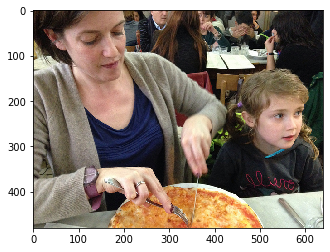

In [21]:
flipped = images[1].permute(1,2,0).numpy()

plt.imshow(flipped)

In [21]:
%debug

> /home/skorokhodov/pyvenvs/human-pose/lib/python3.6/site-packages/albumentations/augmentations/functional.py(94)hflip()
     92 
     93 def hflip(img):
---> 94     return np.ascontiguousarray(img[:, ::-1, ...])
     95 
     96 



ipdb>  type(img)


<class 'torch.Tensor'>


ipdb>  img.shape


torch.Size([640, 416])


ipdb>  exit


In [ ]:
ann = [a for a in tiny_coco['annotations'] if a['id'] == 1249960][0]
img = load_img(ann['image_id'])

In [15]:
t